In [21]:
import datetime
import backtrader as bt
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# **2.1 Paso 1: Análisis de los Datos**
En este primer paso se espera que los alumnos realicen un análisis exploratorio de los datos obtenidos. Es fundamental contar con una buena comprensi  ́on del comportamiento hist  ́orico de
los activos antes de aplicar cualquier estrategia. Para ello, se recomienda:

# **2.1.1. Importación y limpieza de los datos:**
- Utilizar bibliotecas como pandas para importar los datos en formato CSV o directamente desde la API de yfinance.
- Verificar la existencia de valores nulos, datos duplicados o inconsistencias en las series temporales, y proceder a su corrección o eliminación.
- Asegurarse de que las fechas estén en el formato adecuado y de que todos los activos tengan la misma periodicidad para facilitar el análisis conjunto

In [1]:
import yfinance as yf
import pandas as pd

# Definir el diccionario con las empresas y sus respectivos tickers
tickers_dict = {
    'Ticker': ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 
               'TSLA', 'BRK-B', 'META', 'V', 'JNJ', 
               'XOM', 'UNH', 'PG', 'JPM', 'MA'],
    'Empresa': [
        'Apple',
        'Microsoft',
        'Alphabet (Google)',
        'Amazon',
        'Nvidia',
        'Tesla',
        'Berkshire Hathaway',
        'Meta (Facebook)',
        'Visa',
        'Johnson & Johnson',
        'ExxonMobil',
        'UnitedHealth Group',
        'Procter & Gamble',
        'JPMorgan Chase & Co.',
        'Mastercard'
    ]
}

# Extraer la lista de tickers
tickers = tickers_dict['Ticker']

# Descargar datos históricos de las empresas seleccionadas
datos = yf.download(tickers, start='2015-03-03', end='2025-03-03')

# Mostrar las primeras filas de los datos descargados
print(datos.head())

# Convertir el diccionario en un DataFrame para mejor visualización
df_empresas = pd.DataFrame(tickers_dict)
print(df_empresas)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  15 of 15 completed

Price           Close                                                          \
Ticker           AAPL       AMZN       BRK-B      GOOGL        JNJ        JPM   
Date                                                                            
2015-03-03  28.889677  19.230499  145.929993  28.801800  77.579605  47.069855   
2015-03-04  28.706535  19.136000  144.919998  28.778910  77.056564  47.191387   
2015-03-05  28.230856  19.391500  146.059998  28.933172  77.716057  47.092644   
2015-03-06  28.273279  19.004499  145.279999  28.508699  75.889137  46.249527   
2015-03-09  28.393879  18.927999  146.130005  28.568415  76.306076  46.712868   

Price                                                  ...    Volume           \
Ticker             MA       META       MSFT      NVDA  ...       JPM       MA   
Date                                                   ...                      
2015-03-03  85.579063  79.297089  37.353825  0.534396  ...  13706900  3444400   
2015-03-04  86.275215  80.5

In [2]:
datos.to_csv('datos_historicos.csv')

In [3]:
df = datos

In [4]:
df.shape

(2515, 75)

In [5]:
df.isnull().sum()

# Eliminar filas con valores nulos
df = datos.dropna()

In [6]:
df.index = pd.to_datetime(df.index)

In [7]:
# Extraer los precios de cierre para cada ticker
precios_cierre = df['Close']

# Calcular los rendimientos diarios (porcentaje de cambio) para cada activo
rendimientos = precios_cierre.pct_change().dropna()

# Mostrar las primeras filas de los rendimientos calculados
rendimientos.head()


Ticker,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,MA,META,MSFT,NVDA,PG,TSLA,UNH,V,XOM
Date,,,,,,,,,,,,,,,
2015-03-04,-0.006339,-0.004914,-0.006921,-0.000795,-0.006742,0.002582,0.008135,0.016332,-0.005083,0.011272,-0.009511,0.014432,0.008507,-0.005631,-0.005022
2015-03-05,-0.016570,0.013352,0.007866,0.005360,0.008559,-0.002092,0.011994,0.003832,0.001161,0.019171,0.003320,-0.008941,0.008522,0.001389,-0.005047
2015-03-06,0.001503,-0.019957,-0.005340,-0.014671,-0.023508,-0.017903,-0.021765,-0.014777,-0.017397,-0.013561,-0.023278,-0.033644,-0.016639,-0.017474,-0.012797
2015-03-09,0.004266,-0.004025,0.005851,0.002095,0.005494,0.010018,0.003635,-0.007124,0.011567,0.002660,0.005202,-0.015473,0.017895,0.007722,-0.005489
2015-03-10,-0.020686,-0.023906,-0.020119,-0.024821,-0.011226,-0.025041,-0.025022,-0.023792,-0.019136,0.017249,-0.018655,-0.002934,-0.021236,-0.022917,-0.010568


In [8]:
print(df.columns)

MultiIndex([( 'Close',  'AAPL'),
            ( 'Close',  'AMZN'),
            ( 'Close', 'BRK-B'),
            ( 'Close', 'GOOGL'),
            ( 'Close',   'JNJ'),
            ( 'Close',   'JPM'),
            ( 'Close',    'MA'),
            ( 'Close',  'META'),
            ( 'Close',  'MSFT'),
            ( 'Close',  'NVDA'),
            ( 'Close',    'PG'),
            ( 'Close',  'TSLA'),
            ( 'Close',   'UNH'),
            ( 'Close',     'V'),
            ( 'Close',   'XOM'),
            (  'High',  'AAPL'),
            (  'High',  'AMZN'),
            (  'High', 'BRK-B'),
            (  'High', 'GOOGL'),
            (  'High',   'JNJ'),
            (  'High',   'JPM'),
            (  'High',    'MA'),
            (  'High',  'META'),
            (  'High',  'MSFT'),
            (  'High',  'NVDA'),
            (  'High',    'PG'),
            (  'High',  'TSLA'),
            (  'High',   'UNH'),
            (  'High',     'V'),
            (  'High',   'XOM'),
          

# **2.1.2. Análisis exploratorio:**

In [9]:
# Calcular los rendimientos diarios (porcentaje de cambio) para cada activo
rendimientos = precios_cierre.pct_change().dropna()

# Estadísticas descriptivas de los rendimientos diarios
estadisticas = rendimientos.describe()
print(estadisticas)


Ticker         AAPL         AMZN        BRK-B        GOOGL          JNJ  \
count   2514.000000  2514.000000  2514.000000  2514.000000  2514.000000   
mean       0.001006     0.001165     0.000575     0.000868     0.000365   
std        0.017911     0.020484     0.012210     0.018011     0.011397   
min       -0.128647    -0.140494    -0.095921    -0.116341    -0.100379   
25%       -0.007395    -0.008638    -0.005381    -0.007570    -0.004856   
50%        0.000899     0.001093     0.000523     0.001189     0.000382   
75%        0.010099     0.011295     0.006666     0.009663     0.005938   
max        0.119809     0.141311     0.116099     0.162584     0.079977   

Ticker          JPM           MA         META         MSFT         NVDA  \
count   2514.000000  2514.000000  2514.000000  2514.000000  2514.000000   
mean       0.000834     0.000900     0.001131     0.001085     0.002648   
std        0.017193     0.016796     0.023649     0.017030     0.031016   
min       -0.149649    -

C:\Users\pablo\AppData\Local\Temp\ipykernel_1812\2317168649.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20', len(precios_cierre.columns))  # 'tab20' tiene 20 colores diferentes


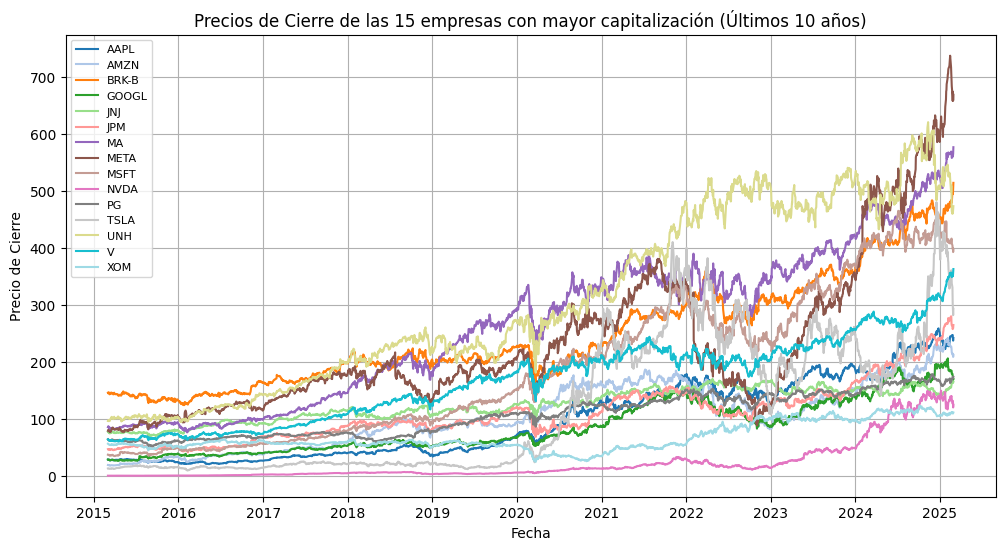

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Definir una paleta de colores con 15 colores únicos
colormap = plt.cm.get_cmap('tab20', len(precios_cierre.columns))  # 'tab20' tiene 20 colores diferentes

for i, ticker in enumerate(precios_cierre.columns):
    plt.plot(precios_cierre[ticker], label=ticker, color=colormap(i))

plt.title('Precios de Cierre de las 15 empresas con mayor capitalización (Últimos 10 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(loc='upper left', fontsize=8)
plt.grid(True)
plt.show()


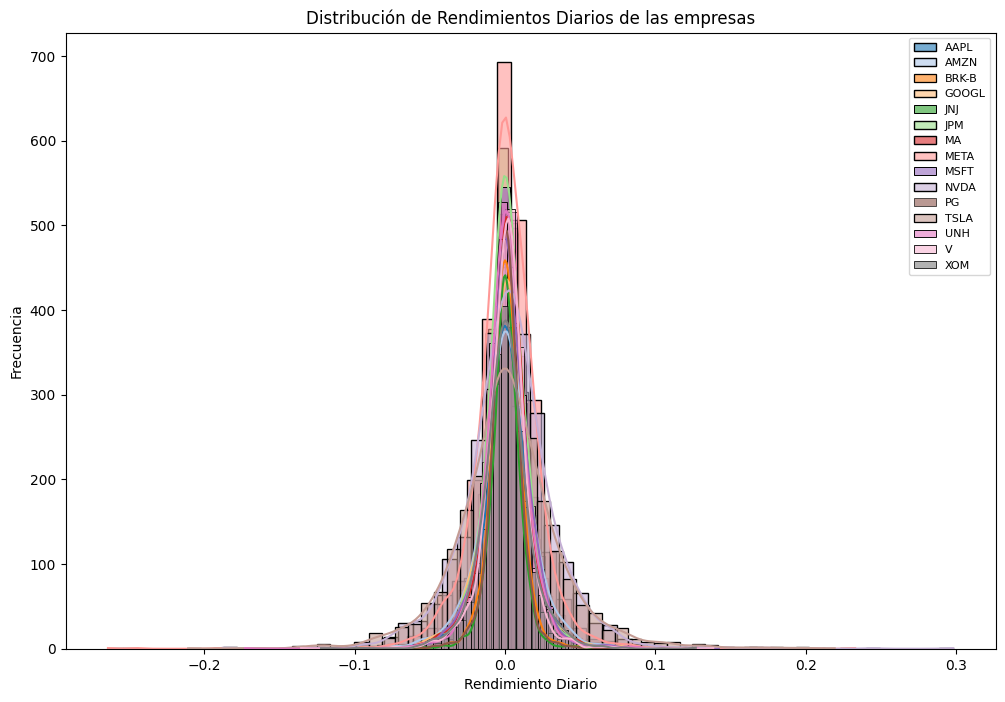

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Obtener una paleta de colores con 15 colores únicos
palette = sns.color_palette('tab20', len(rendimientos.columns))  # 'tab20' tiene hasta 20 colores distintos

# Graficar cada activo con un color diferente
for i, ticker in enumerate(rendimientos.columns):
    sns.histplot(rendimientos[ticker], kde=True, label=ticker, bins=50, color=palette[i], alpha=0.6)

plt.title('Distribución de Rendimientos Diarios de las empresas')
plt.xlabel('Rendimiento Diario')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right', fontsize=8)  # Ubicar mejor la leyenda
plt.show()


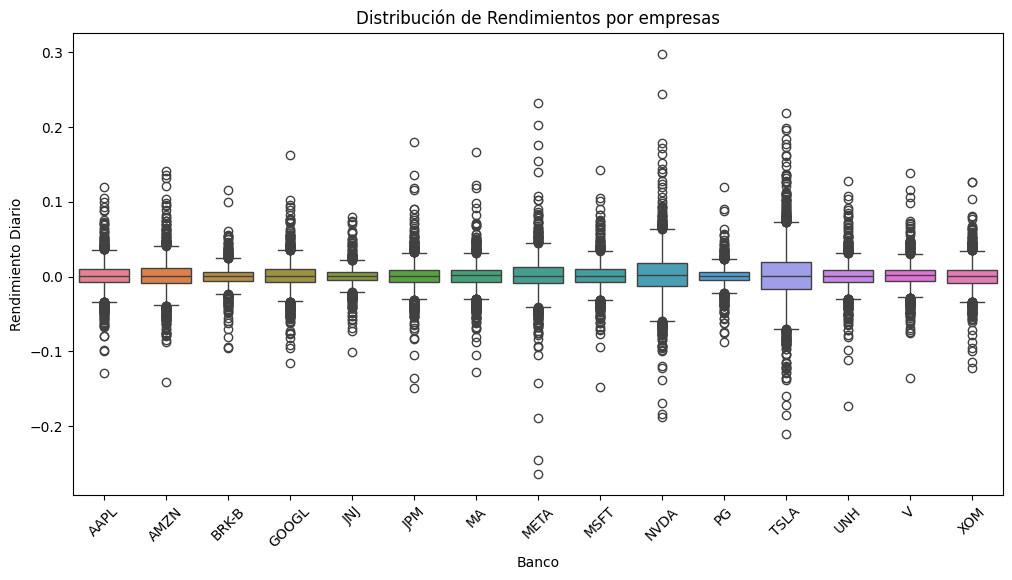

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=rendimientos)
plt.title("Distribución de Rendimientos por empresas")
plt.xlabel("Banco")
plt.ylabel("Rendimiento Diario")
plt.xticks(rotation=45)
plt.show()


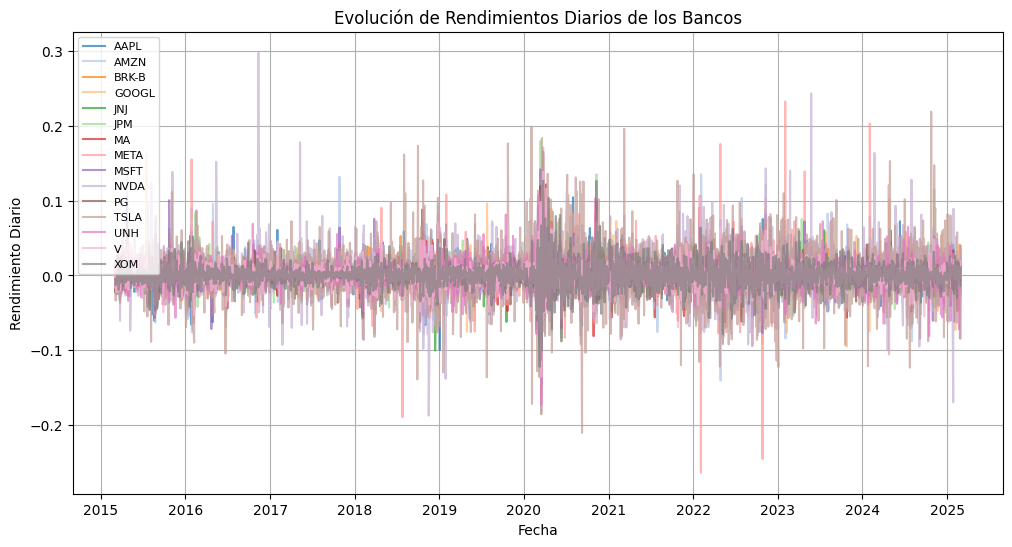

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una paleta de colores con más de 15 colores (usamos 'tab20' que tiene 20 colores)
palette = sns.color_palette('tab20', len(rendimientos.columns))

plt.figure(figsize=(12, 6))

# Graficar cada ticker con un color único de la paleta
for i, ticker in enumerate(rendimientos.columns):
    plt.plot(rendimientos.index, rendimientos[ticker], label=ticker, color=palette[i], alpha=0.7)

plt.title("Evolución de Rendimientos Diarios de los Bancos")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento Diario")
plt.legend(loc='upper left', fontsize=8)  # Puedes ajustar el tamaño de la leyenda
plt.grid(True)
plt.show()


In [14]:
# Calcular la volatilidad (desviación estándar anualizada)
volatilidad_anualizada = rendimientos.std() * (252 ** 0.5)  # 252 días de mercado en un año
print(volatilidad_anualizada)


Ticker
AAPL     0.284322
AMZN     0.325178
BRK-B    0.193825
GOOGL    0.285914
JNJ      0.180914
JPM      0.272931
MA       0.266635
META     0.375414
MSFT     0.270337
NVDA     0.492362
PG       0.185758
TSLA     0.574595
UNH      0.262942
V        0.243670
XOM      0.277767
dtype: float64


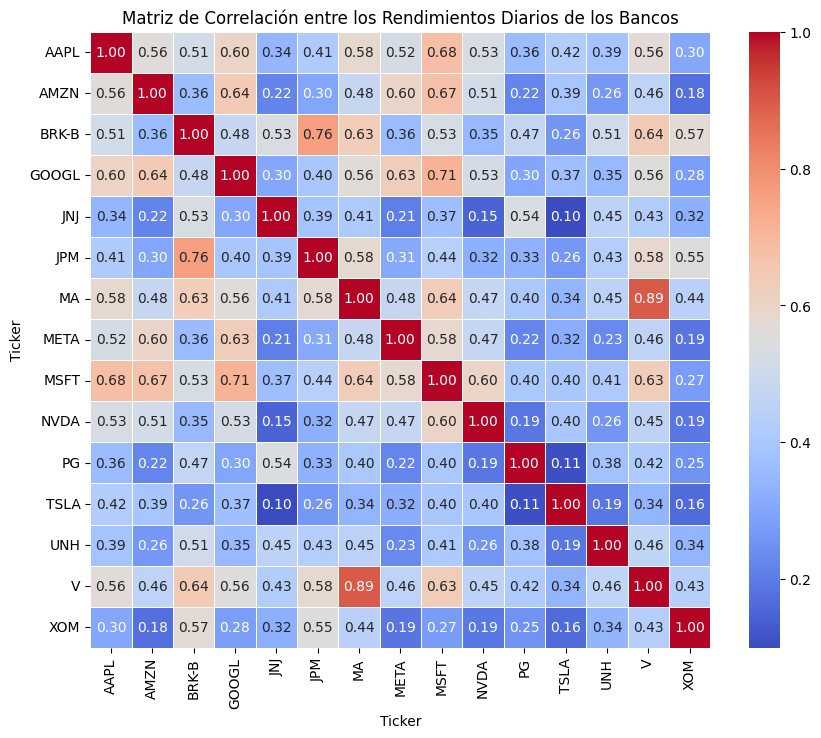

In [15]:
# Matriz de correlación entre los rendimientos diarios de los bancos
correlacion = rendimientos.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre los Rendimientos Diarios de los Bancos')
plt.show()

# **2.2.2 Implementación de estrategias de optimización de carteras**

### **2.2.2.1: Estrategia de minima varianza**

In [16]:
def calcular_covarianza_garch(rendimientos):
    n = rendimientos.shape[1]
    cov_matrix = np.zeros((n, n))
    for i in range(n):
        # Escalar los retornos antes de pasar al modelo
        rendimientos_scaled = rendimientos.iloc[:, i] * 100
        modelo_garch = arch_model(rendimientos_scaled, vol='Garch', p=1, q=1)
        ajuste = modelo_garch.fit(disp='off')
        cov_matrix[i, i] = ajuste.conditional_volatility.mean() ** 2
    return cov_matrix

In [17]:
import cvxpy as cp
from arch import arch_model

def optimizar_cartera_min_var(cov_matrix):
    n = cov_matrix.shape[0]
    
    # Variables de optimización: las ponderaciones de los activos
    w = cp.Variable(n)
    
    # Función objetivo: minimizar la varianza de la cartera
    objetivo = cp.Minimize(cp.quad_form(w, cov_matrix))
    
    # Restricciones: que las ponderaciones sumen a 1 y no haya posiciones cortas
    restricciones = [cp.sum(w) == 1, w >= 0]
    
    # Resolver el problema de optimización
    problema = cp.Problem(objetivo, restricciones)
    problema.solve()
    
    # Las ponderaciones óptimas de los activos
    return w.value

# Supongamos que tenemos los rendimientos y la matriz de covarianzas
# rendimientos es un DataFrame de pandas con los rendimientos diarios de los activos
cov_matrix = calcular_covarianza_garch(rendimientos)

# Resolver el problema de optimización
pesos_optimos = optimizar_cartera_min_var(cov_matrix)
print("Pesos óptimos:", pesos_optimos)


Pesos óptimos: [0.05421084 0.03923247 0.1259444  0.05061983 0.13800871 0.06546412
 0.06772877 0.02789038 0.0604491  0.01665874 0.13542895 0.01266485
 0.06618392 0.07856065 0.06095427]


# **2.2.2.2. Estrategia de Optimización Media-Varianza (Modelo de Markowitz):**

Dimensiones de los rendimientos: (2514, 15)
Estado de la optimización: optimal
Valor objetivo (Ratio de Sharpe): -0.008637890475304942
Pesos óptimos del portafolio:
AAPL: 0.0250
MSFT: 0.1500
GOOGL: 0.0250
AMZN: 0.0250
NVDA: 0.0250
TSLA: 0.0250
BRK-B: 0.0250
META: 0.1500
V: 0.1500
JNJ: 0.1500
XOM: 0.0250
UNH: 0.1500
PG: 0.0250
JPM: 0.0250
MA: 0.0250


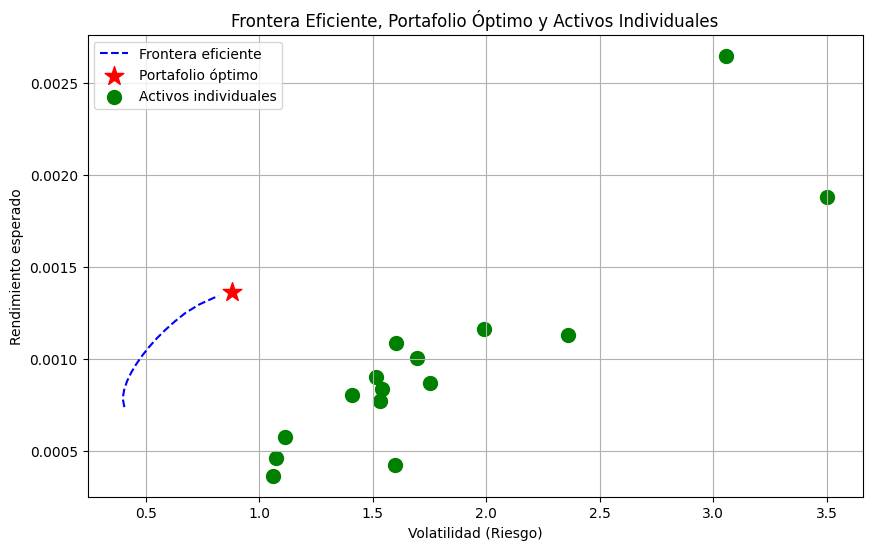

In [25]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

def optimizacion_markowitz(rendimientos, rf=0.01, max_weight=0.25, min_weight=0.0, verbose=False):
    """
    Optimiza un portafolio utilizando el modelo de Markowitz, maximizando el Ratio de Sharpe.
    
    Parámetros:
    - rendimientos: DataFrame de pandas con los rendimientos de los activos.
    - rf: tasa libre de riesgo (por defecto 0.01).
    - max_weight: peso máximo permitido por activo (por defecto 0.25).
    - min_weight: peso mínimo permitido por activo (por defecto 0.0).
    - verbose: Si True, imprime información sobre la optimización (por defecto False).
    
    Devuelve:
    - w: vector de pesos óptimos para cada activo.
    """
    # Verificación de datos válidos
    if rendimientos.isnull().any().any():
        raise ValueError("Los rendimientos contienen valores nulos. Por favor, limpia los datos antes de proceder.")
    
    # Verificación de las dimensiones de los rendimientos
    n = rendimientos.shape[1]
    if n < 2:
        raise ValueError("El número de activos debe ser al menos 2.")
    
    print(f"Dimensiones de los rendimientos: {rendimientos.shape}")
    
    # Calcular la matriz de covarianza utilizando el modelo GARCH
    cov_matrix = calcular_covarianza_garch(rendimientos)
    
    # Verificación de la forma de la matriz de covarianza
    if cov_matrix.shape != (n, n):
        raise ValueError(f"La matriz de covarianza tiene una forma inesperada: {cov_matrix.shape}")
    
    # Calcular los rendimientos medios de cada activo
    media_retornos = rendimientos.mean()
    
    # Número de activos
    n = len(cov_matrix)
    
    # Crear variable de optimización para los pesos del portafolio
    w = cp.Variable(n)
    
    # Definir el rendimiento esperado del portafolio
    retorno_portafolio = media_retornos.values @ w
    
    # Definir la varianza del portafolio
    varianza_portafolio = cp.quad_form(w, cov_matrix)
    
    # Definir restricciones
    restricciones = [
        cp.sum(w) == 1,   # Los pesos deben sumar 1
        w >= 0,           # Los pesos no pueden ser negativos
        w <= max_weight,  # Límite superior de peso por activo
        w >= min_weight   # Límite inferior de peso por activo
    ]
    
    # Variable auxiliar para la varianza máxima (se utiliza en la reformulación)
    t = cp.Variable()
    
    # Reformulación del problema para maximizar el rendimiento ajustado por el riesgo (Ratio de Sharpe)
    problema = cp.Problem(
        cp.Maximize(retorno_portafolio - rf),
        restricciones + [varianza_portafolio <= t, t >= 0]
    )
    
    # Resolver el problema de optimización
    problema.solve()
    
    # Imprimir la solución si verbose es True
    if verbose:
        print(f"Estado de la optimización: {problema.status}")
        print(f"Valor objetivo (Ratio de Sharpe): {problema.value}")
    
    # Devolver los pesos óptimos
    return w.value

# Supongamos que ya tienes definido "rendimientos" (DataFrame) y "tickers" (lista de nombres de activos)
pesos_optimos = optimizacion_markowitz(rendimientos, max_weight=0.15, min_weight=0.025, verbose=True)  # Límite de 15% por activo

# Imprimir los pesos óptimos con los nombres de los activos
print("Pesos óptimos del portafolio:")
for ticker, peso in zip(tickers, pesos_optimos):
    print(f"{ticker}: {peso:.4f}")

# --------------------- Creación del gráfico de la frontera eficiente ---------------------
# Calcular el rendimiento esperado y la volatilidad del portafolio óptimo
media_retornos = rendimientos.mean().values
cov_matrix = calcular_covarianza_garch(rendimientos)
retorno_optimo = media_retornos @ pesos_optimos
volatilidad_optima = np.sqrt(pesos_optimos.T @ cov_matrix @ pesos_optimos)

# Construir la frontera eficiente
n_activos = len(media_retornos)
target_returns = np.linspace(min(media_retornos), max(media_retornos), 50)
efficient_vols = []

for target in target_returns:
    # Minimización de la varianza para un rendimiento objetivo dado
    w_temp = cp.Variable(n_activos)
    objetivo = cp.Minimize(cp.quad_form(w_temp, cov_matrix))
    restricciones = [
        cp.sum(w_temp) == 1,
        media_retornos @ w_temp == target,
        w_temp >= 0,
        w_temp <= 0.15,   # Se utiliza el mismo límite superior que en la optimización inicial
        w_temp >= 0.025   # Y el mismo límite inferior
    ]
    prob = cp.Problem(objetivo, restricciones)
    prob.solve()
    if prob.status == 'optimal' or prob.status == 'optimal_inaccurate':
        vol = np.sqrt(cp.quad_form(w_temp, cov_matrix).value)
        efficient_vols.append(vol)
    else:
        efficient_vols.append(np.nan)

# Calcular volatilidad individual y rendimiento de cada activo
volatilidades_individuales = np.sqrt(np.diag(cov_matrix))
rendimientos_individuales = media_retornos

# Graficar la frontera eficiente, el portafolio óptimo y los puntos de cada activo
plt.figure(figsize=(10, 6))
plt.plot(efficient_vols, target_returns, 'b--', label='Frontera eficiente')
plt.scatter(volatilidad_optima, retorno_optimo, c='red', marker='*', s=200, label='Portafolio óptimo')
plt.scatter(volatilidades_individuales, rendimientos_individuales, c='green', marker='o', s=100, label='Activos individuales')

plt.xlabel('Volatilidad (Riesgo)')
plt.ylabel('Rendimiento esperado')
plt.title('Frontera Eficiente, Portafolio Óptimo y Activos Individuales')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Optimizar el portafolio utilizando el Modelo de Markowitz
pesos_optimos = optimizacion_markowitz(rendimientos, max_weight=0.15, min_weight=0.025, verbose=True)  # Límite de 15% por activo

# Imprimir los pesos óptimos con los nombres de los activos
print("Pesos óptimos del portafolio:")
for ticker, peso in zip(tickers, pesos_optimos):
    print(f"{ticker}: {peso:.4f}")


Dimensiones de los rendimientos: (2514, 15)
Estado de la optimización: optimal
Valor objetivo (Ratio de Sharpe): -0.008637890475304942
Pesos óptimos del portafolio:
AAPL: 0.0250
MSFT: 0.1500
GOOGL: 0.0250
AMZN: 0.0250
NVDA: 0.0250
TSLA: 0.0250
BRK-B: 0.0250
META: 0.1500
V: 0.1500
JNJ: 0.1500
XOM: 0.0250
UNH: 0.1500
PG: 0.0250
JPM: 0.0250
MA: 0.0250


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

def graficar_frontera_eficiente(rendimientos, rf=0.01, num_p=10000):
    """
    Grafica la frontera eficiente del modelo de Markowitz y el portafolio óptimo basado en el Ratio de Sharpe.
    
    Parámetros:
    - rendimientos: DataFrame de pandas con los rendimientos de los activos.
    - rf: tasa libre de riesgo (por defecto 0.01).
    - num_p: número de portafolios aleatorios a generar (por defecto 10,000).
    """
    n = rendimientos.shape[1]
    media_retornos = rendimientos.mean()
    cov_matrix = rendimientos.cov()
    
    pesos_random = np.random.dirichlet(np.ones(n), num_p)
    rendimientos_portafolio = pesos_random @ media_retornos.values
    riesgos_portafolio = np.sqrt(np.einsum('ij,jk,ik->i', pesos_random, cov_matrix.values, pesos_random))
    
    # Optimización para encontrar el portafolio de máxima razón de Sharpe
    w = cp.Variable(n)
    retorno_portafolio = media_retornos.values @ w
    varianza_portafolio = cp.quad_form(w, cov_matrix.values)
    restricciones = [
        cp.sum(w) == 1,
        w >= 0
    ]
    problema = cp.Problem(cp.Maximize((retorno_portafolio - rf) / cp.sqrt(varianza_portafolio)), restricciones)
    problema.solve()
    pesos_optimos = w.value
    retorno_optimo = media_retornos.values @ pesos_optimos
    riesgo_optimo = np.sqrt(pesos_optimos.T @ cov_matrix.values @ pesos_optimos)
    
    # Graficar la frontera eficiente
    plt.figure(figsize=(10, 6))
    plt.scatter(riesgos_portafolio, rendimientos_portafolio, c=(rendimientos_portafolio - rf) / riesgos_portafolio, cmap='viridis', alpha=0.5)
    plt.colorbar(label='Ratio de Sharpe')
    plt.scatter(riesgo_optimo, retorno_optimo, c='red', marker='*', s=200, label='Portafolio Óptimo')
    plt.xlabel('Riesgo (Desviación Estándar)')
    plt.ylabel('Rendimiento Esperado')
    plt.title('Frontera Eficiente de Markowitz')
    plt.legend()
    plt.grid(True)
    plt.show()


In [23]:
graficar_frontera_eficiente(rendimientos, rf=0.01, num_p=10000)

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
power(QuadForm(var226, [[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]]), 0.5)

# **2.2.2.3. CVAR**

In [20]:
def optimizacion_cvar(rendimientos, alpha=0.05, max_weight=0.25, min_weight=0.025, rf=0.01):
    """
    Optimiza un portafolio minimizando el Conditional Value-at-Risk (CVaR) para un nivel alpha dado.
    
    Parameters:
    rendimientos (DataFrame): Los rendimientos históricos de los activos.
    alpha (float): El nivel de significancia para el CVaR, entre 0 y 1.
    max_weight (float): El límite máximo de peso por activo.
    min_weight (float): El límite mínimo de peso por activo.
    rf (float): El rendimiento libre de riesgo.
    
    Returns:
    np.array: Pesos óptimos de los activos en el portafolio.
    """
    # Validación de entradas
    if not (0 < alpha < 1):
        raise ValueError("El valor de alpha debe estar entre 0 y 1")
    
    n, m = rendimientos.shape  # n = número de observaciones, m = número de activos
    w = cp.Variable(m)  # Pesos de los activos
    z = cp.Variable(n)  # Variables auxiliares para la optimización CVaR
    v = cp.Variable()  # Pérdida condicional
    
    # Retorno del portafolio ajustado por el rendimiento libre de riesgo
    portafolio_retorno = rendimientos.values @ w - rf
    
    # Definir restricciones
    restricciones = [
        cp.sum(w) == 1,  # La suma de los pesos debe ser 1 (100%)
        w >= 0,  # Los pesos no pueden ser negativos
        w <= max_weight,  # Límite superior de peso por activo
        w >= min_weight  # Límite inferior de peso por activo
    ]
    
    # Restricciones CVaR
    restricciones += [z >= -portafolio_retorno - v, z >= 0]  # Restricciones de las pérdidas z
    
    # Función objetivo: minimizar el CVaR
    objetivo = v + (1 / (alpha * n)) * cp.sum(z)
    
    # Resolver el problema de optimización
    problema = cp.Problem(cp.Minimize(objetivo), restricciones)
    problema.solve()
    
    # Devolver los pesos óptimos del portafolio
    return w.value

# Ejemplo de uso con datos simulados
rendimientos_simulados = pd.DataFrame(np.random.randn(100, 15) / 100, columns=['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'BRK-B', 'META', 'V', 'JNJ', 'XOM', 'UNH', 'PG', 'JPM', 'MA'])
pesos_optimos = optimizacion_cvar(rendimientos_simulados)
print(pesos_optimos)

[0.04217029 0.02725537 0.14177545 0.025      0.08480012 0.08324661
 0.05280573 0.05834566 0.025      0.025      0.08854428 0.14375116
 0.09667053 0.0584835  0.04715128]
